In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

EPOCHS=10

data = keras.datasets.fashion_mnist

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = data.load_data()

train_images= train_images/255.0
test_images= test_images/255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

H = model.fit(train_images, train_labels, epochs=EPOCHS)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2455 - accuracy: 0.9090
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.3334 - accuracy:

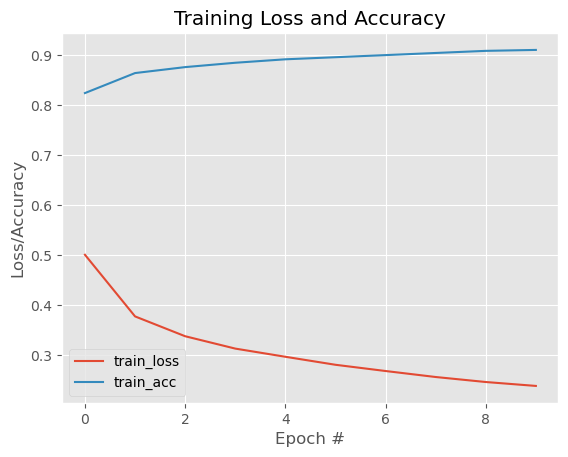

In [15]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")


In [16]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[0])])

313/313 [==============================] - 0s 1ms/step
Ankle boot


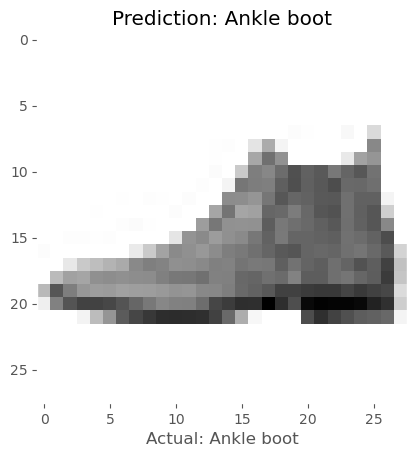

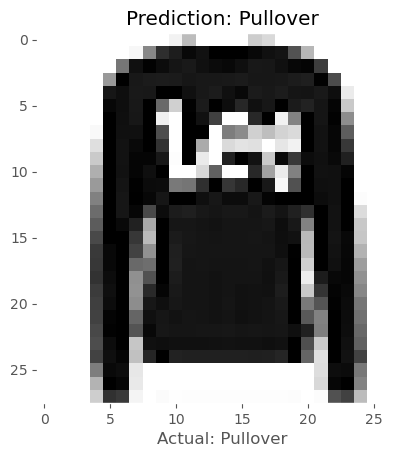

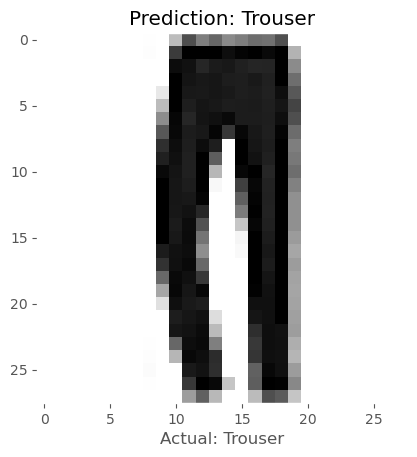

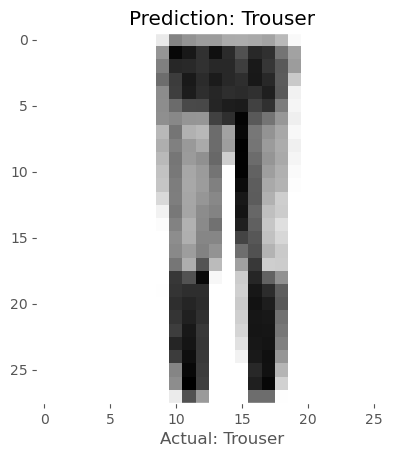

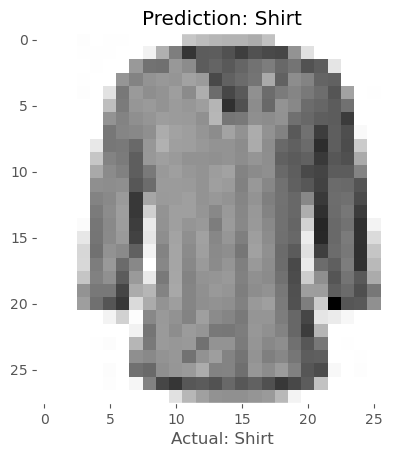

In [26]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()

In [28]:
model.save("Classify images of clothing.model", save_format="h5")